# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print(f'There are {len(human_files)} total human images.')
print(f'There are {len(dog_files)} total dog images.')

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


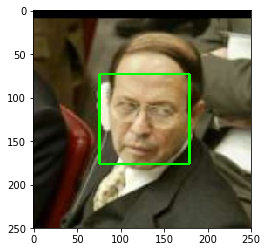

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[np.random.randint(0, len(human_files))])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x, y, w, h) in faces:
    # add bounding box to color image
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
def face_detector(img_path):
    """ Returns True if face is detected in image stored at img_path """
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- percentage of the first 100 images in 'human_files' have a detected human face: 98.0%
- percentage of the first 100 images in 'dog_files' have a detected human face: 17.0%

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_score = []
dog_score = []

for i in tqdm(range(100), ncols=100):
    human_score.append(face_detector(human_files_short[i]))
    dog_score.append(face_detector(dog_files_short[i]))
    

print(f"\npercentage of the first 100 images in 'human_files' have a detected human face: {np.mean(human_score)*100}%")
print(f"percentage of the first 100 images in 'dog_files' have a detected human face: {np.mean(dog_score)*100}%")


100%|█████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  3.63it/s]


percentage of the first 100 images in 'human_files' have a detected human face: 98.0%
percentage of the first 100 images in 'dog_files' have a detected human face: 17.0%


*[Resources: tqdm documentation](https://tqdm.github.io/)*

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

###  Testing other face detection approaches

- _[Resources: A guide to Face Detection in Python](https://towardsdatascience.com/a-guide-to-face-detection-in-python-3eab0f6b9fc1)_
- _[Resources: Face Detection – OpenCV, Dlib and Deep Learning](https://learnopencv.com/face-detection-opencv-dlib-and-deep-learning-c-python/)_
- _[Resources: How to Perform Face Detection with Deep Learning](https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/)_

#### Using Histogram of Oriented Gradients (HOG) 

_We need to install the following packages:_

In [23]:
!pip install dlib

In [24]:
!pip install imutils

  Running setup.py bdist_wheel for imutils ... done
  Stored in directory: /root/.cache/pip/wheels/db/23/45/fc7424906880ffa9577a2a428b961f2b79e0e21d9f71e7e6bc
Successfully built imutils


Number of faces detected: 1


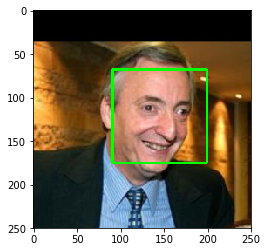

In [25]:
import dlib
from imutils import face_utils


# load color (BGR) image
img = cv2.imread(human_files[np.random.randint(0, len(human_files))])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im = np.float32(gray) / 255.0

# Calculate gradient 
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

face_detect = dlib.get_frontal_face_detector()

rects = face_detect(gray, 1)
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    
# print number of faces detected in the image
print('Number of faces detected:', len(rects))

# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

**Check performance**

In [26]:
def face_detector_HOG(img_path):
    """ Returns True if face is detected in image stored at img_path """
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im = np.float32(gray) / 255.0

    # Calculate gradient d
    gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
    
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    face_detect = dlib.get_frontal_face_detector()

    faces = face_detect(gray, 1)
    return len(faces) > 0

In [27]:
human_score = []
dog_score = []

for i in tqdm(range(100), ncols=100):
    human_score.append(face_detector_HOG(human_files_short[i]))
    dog_score.append(face_detector_HOG(dog_files_short[i]))
    

print(f"\npercentage of the first 100 images in 'human_files' have a detected human face: {np.mean(human_score)*100}%")
print(f"percentage of the first 100 images in 'dog_files' have a detected human face: {np.mean(dog_score)*100}%")

100%|█████████████████████████████████████████████████████████████| 100/100 [02:01<00:00,  1.05it/s]


percentage of the first 100 images in 'human_files' have a detected human face: 100.0%
percentage of the first 100 images in 'dog_files' have a detected human face: 7.000000000000001%


- Better performance than OpenCV's classifier

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:11<00:00, 49251368.46it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

In [7]:
# explore the model
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

- Inputs must be: 224x224x3
- _[Resources: VGG16](https://neurohive.io/en/popular-networks/vgg16/)_

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

In [9]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    # define transforms
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor()])
    # load the image
    image = Image.open(img_path)
    
    # pre-process the image
    image = transform(image).unsqueeze(0)
    
    # move image to GPU if CUDA is available
    if use_cuda:
        image = image.cuda()
    # get output probabilities
    output = VGG16(image)
    # convert output probabilities to predicted class and get the index
    index = torch.argmax(output)
    index = index.item()
    
    return index # predicted class index

252


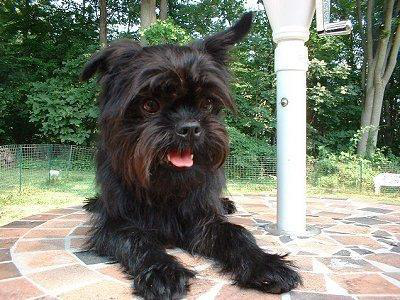

In [10]:
img_path = '/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'

print(VGG16_predict(img_path))
Image.open(img_path)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
def dog_detector(img_path):
    '''returns True if a dog is detected in the image stored at img_path'''
    return (151 <= VGG16_predict(img_path) <= 268) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- percentage of the images in 'human_files_short' have a detected dog: 0.0%
- percentage of the images in 'dog_files_short' have a detected dog: 90.0%

In [12]:
human_score = []
dog_score = []

for i in tqdm(range(100), ncols=100):
    human_score.append(dog_detector(human_files_short[i]))
    dog_score.append(dog_detector(dog_files_short[i]))
    

print(f"\npercentage of the images in 'human_files_short' have a detected dog: {np.mean(human_score)*100}%")
print(f"percentage of the images in 'dog_files_short' have a detected dog: {np.mean(dog_score)*100}%")

100%|█████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.73it/s]


percentage of the images in 'human_files_short' have a detected dog: 0.0%
percentage of the images in 'dog_files_short' have a detected dog: 92.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | - | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
from torchvision import datasets

### data directories ###
data_dir = '/data/dog_images'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

### transforms ###
# train transform - apply data augmentation 
train_transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                         std=[0.5, 0.5, 0.5])])
                                     
# valid transform
valid_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                          std=[0.5, 0.5, 0.5])])

# test transform 
test_transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                         std=[0.5, 0.5, 0.5])])
                                     
                                     
### load the data and apply transforms ###
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

### DataLoader ###
batch_size = 20
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- I have resized the images to 256 x 256 and then cropped the images to 224 x 224 to match the input for the VGG16 model.
- For data augmentation, I decided to make random rotation by 10 degrees, random horizontal flip to increase the images to give randomness to the dataset to avoid overfitting and for better model performance. And then I normalized the images to enhance the model performance.
- For the valid and test data, I used standard transforms with resize and crop. Following by a normalization.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
# OSError: image file is truncated
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

_[Resources](https://stackoverflow.com/questions/60584155/oserror-image-file-is-truncated)_

In [48]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super().__init__()
        ## Define layers of a CNN
        
        #### tracking shapes ####
        # in (224x224x3) > conv1 (224x224x32) > pool (112x112x32) > conv2 (112x112x64) > pool (56x56x64)
        # conv3 (56x56x128) > pool (28x28x128) > conv4 (28x28x256)
        #########################
        
        # convolution layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        
        # pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        

        #### tracking shapes ####
        # fc1_in (14x14x256) > fc1_out(500) > fc2_out (number of classes)
        #########################
        
        # fully connected layets
        self.fc1 = nn.Linear(28*28*128 , 500)
        self.fc2 = nn.Linear(500, len(train_data.classes))
        
        # dropout p=0.2
        self.dropout = nn.Dropout(p=0.2)

    
    def forward(self, x):
        ### Define forward behavior
        ## 1. conv layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        ## 2. fc layers
        # flatten input image
        x = x.view(-1, 28*28*128)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        
        return x


#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [49]:
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- My architecture consists of 3 convolution layers each with a kernel size of 3x3 and padding of 1.
- Each convolution layer has a ReLU activation function followed by a pooling layer with kernel size 2x2 and stride of 2.
- Next, two of fully connceted layers, first I flattened the input to match the output of the last convolutional layer. (28x28x128)
- A dropout (0.2) is used to avoid overfitting.
- a ReLU activation funciton is used after the first linear layer.
- The last linear layer have no activation function.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [50]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [51]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients 
            optimizer.zero_grad()
            # forward pass: predicted outputs
            output = model(data)
            # calculate loss
            loss = criterion_scratch(output, target)
            # backward pass: calculate gradient of the loss
            loss.backward()
            # perform a optimization step (parameter update)
            optimizer.step()
            # update loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.4f} \tValidation Loss: {:.4f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.4f} --> {:.4f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
                             
                             
    # return trained model
    return model

In [52]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.8417 	Validation Loss: 4.7228
Validation loss decreased (inf --> 4.7228).  Saving model ...
Epoch: 2 	Training Loss: 4.5527 	Validation Loss: 4.4011
Validation loss decreased (4.7228 --> 4.4011).  Saving model ...
Epoch: 3 	Training Loss: 4.3547 	Validation Loss: 4.3496
Validation loss decreased (4.4011 --> 4.3496).  Saving model ...
Epoch: 4 	Training Loss: 4.2250 	Validation Loss: 4.2114
Validation loss decreased (4.3496 --> 4.2114).  Saving model ...
Epoch: 5 	Training Loss: 4.1183 	Validation Loss: 4.2426
Epoch: 6 	Training Loss: 3.9825 	Validation Loss: 4.0872
Validation loss decreased (4.2114 --> 4.0872).  Saving model ...
Epoch: 7 	Training Loss: 3.8185 	Validation Loss: 3.9977
Validation loss decreased (4.0872 --> 3.9977).  Saving model ...
Epoch: 8 	Training Loss: 3.6808 	Validation Loss: 4.0252
Epoch: 9 	Training Loss: 3.4898 	Validation Loss: 3.9816
Validation loss decreased (3.9977 --> 3.9816).  Saving model ...
Epoch: 10 	Training Loss: 3.2994 	V

In [53]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [54]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.014029


Test Accuracy: 10% (91/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [59]:
# data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [60]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

In [61]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [64]:
# Freeze all training parameters
for param in model_transfer.parameters():
    param.requires_grad = False

# replace last fc layer to output the number of classes
model_transfer.fc = nn.Linear(2048, len(train_data.classes), bias=True)

# set fc parameters to be optimized
for param in model_transfer.fc.parameters():
    param.requires_grad = True

    
if use_cuda:
    model_transfer = model_transfer.cuda()   
    
model_transfer.fc

Linear(in_features=2048, out_features=133, bias=True)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- First, I used the `VGG16` pre-trained model and using Adam optimizer and with one fully connected linear layer replaced the the last layer in the classifier. But the accuracy was arround 50% after training and testing.
- So, I decided to use the `RESNET50` pre-trained model with SGD optimizer.

    - After exploring the model to check the structure, I replaced the last layer with new fully connected layer with number of outputs equals to number of dog classes.
    - I Freezed the model parameters by setting the `requires_grad` attribute to `False`.
    - With `learning rate = 0.001` and `10` epochs to train the model. I got arround 77% of accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [65]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=1e-3)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [70]:
# train the model
model_transfer = train(20, loaders_transfer, 
                       model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.7868 	Validation Loss: 2.5231
Validation loss decreased (inf --> 2.5231).  Saving model ...
Epoch: 2 	Training Loss: 2.6604 	Validation Loss: 2.3909
Validation loss decreased (2.5231 --> 2.3909).  Saving model ...
Epoch: 3 	Training Loss: 2.5319 	Validation Loss: 2.2608
Validation loss decreased (2.3909 --> 2.2608).  Saving model ...
Epoch: 4 	Training Loss: 2.4169 	Validation Loss: 2.1342
Validation loss decreased (2.2608 --> 2.1342).  Saving model ...
Epoch: 5 	Training Loss: 2.3127 	Validation Loss: 2.0577
Validation loss decreased (2.1342 --> 2.0577).  Saving model ...
Epoch: 6 	Training Loss: 2.2188 	Validation Loss: 1.9649
Validation loss decreased (2.0577 --> 1.9649).  Saving model ...
Epoch: 7 	Training Loss: 2.1290 	Validation Loss: 1.8816
Validation loss decreased (1.9649 --> 1.8816).  Saving model ...
Epoch: 8 	Training Loss: 2.0483 	Validation Loss: 1.7739
Validation loss decreased (1.8816 --> 1.7739).  Saving model ...
Epoch: 9 	Training Loss: 1.

In [71]:
# load the model that got the best validation accuracy (uncommnt the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [72]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.192125


Test Accuracy: 82% (689/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [96]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

all_class_dir = os.listdir(data_dir + '/train/')
all_class_dir.sort()
class_names = [name[4:].replace("_", " ") for name in all_class_dir]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    # transforms
    transform = transforms.Compose([transforms.Resize(224),
                                    transforms.CenterCrop(224), 
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                         std=[0.5, 0.5, 0.5])])
    
    
    image = transform(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        image = image.cuda()
        
    pred = model_transfer(image)
    pred = torch.argmax(pred)
    pred = pred.item() 

    return class_names[pred]

In [97]:
## TEST
predict_breed_transfer('/data/dog_images/test/004.Akita/Akita_00282.jpg')

'Akita'

In [98]:
predict_breed_transfer('/data/dog_images/test/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00673.jpg')

'Anatolian shepherd dog'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [99]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither


    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()
    print("Let me check... ~[0_0]~\n")
    if dog_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print(f"Hey dog, Come here! ~[^_^]~\nIt looks like you are a {prediction}.")  
    elif face_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print(f"Hello human ~[^_^]~\nYou know what? You would be a {prediction} if you were a dog.. a beautiful one.")
    else:
        print("Error 404! ~[x_x]~\nNeither a dog nor a human were found.")
    
    print(60*"_",'\n')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
- The main challange I faced was overfitting, the model does great on training set but not good for the validation the test sets.
- I think the preformace will imporve with more number of epochs.
- Also, increasing the depth of the network by adding additional convolutional layers will help to extract higher level features.
- And the more data the more improvment the model get. 
- Maybe, trying more image augmentations will improve performance on test data.
- Hyper-parameter tunings: weight initializings, learning rates, dropouts, batch_sizes, and type of optimizers will be helpful to improve performances.

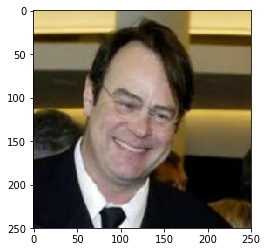

Let me check... ~[0_0]~

Hello human ~[^_^]~
You know what? You would be a Chihuahua if you were a dog.. a beautiful one.
____________________________________________________________ 



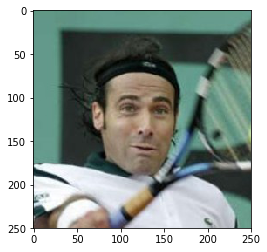

Let me check... ~[0_0]~

Hello human ~[^_^]~
You know what? You would be a Dachshund if you were a dog.. a beautiful one.
____________________________________________________________ 



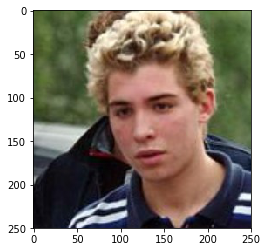

Let me check... ~[0_0]~

Hello human ~[^_^]~
You know what? You would be a Cane corso if you were a dog.. a beautiful one.
____________________________________________________________ 



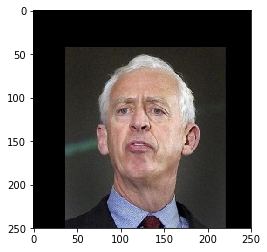

Let me check... ~[0_0]~

Hello human ~[^_^]~
You know what? You would be a Dachshund if you were a dog.. a beautiful one.
____________________________________________________________ 



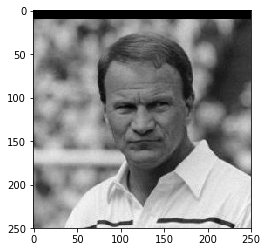

Let me check... ~[0_0]~

Hello human ~[^_^]~
You know what? You would be a German shepherd dog if you were a dog.. a beautiful one.
____________________________________________________________ 



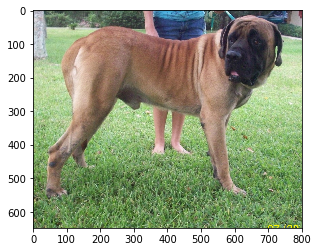

Let me check... ~[0_0]~

Hey dog, Come here! ~[^_^]~
It looks like you are a Bullmastiff.
____________________________________________________________ 



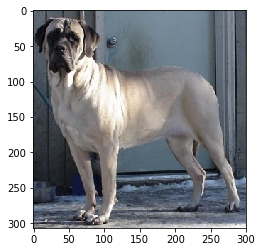

Let me check... ~[0_0]~

Hey dog, Come here! ~[^_^]~
It looks like you are a Bullmastiff.
____________________________________________________________ 



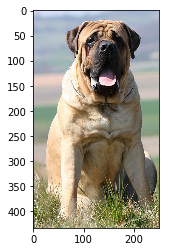

Let me check... ~[0_0]~

Error 404! ~[x_x]~
Neither a dog nor a human were found.
____________________________________________________________ 



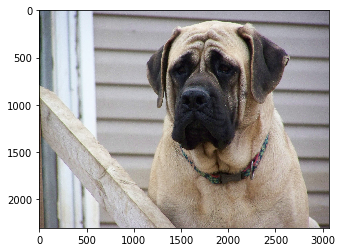

Let me check... ~[0_0]~

Hey dog, Come here! ~[^_^]~
It looks like you are a Mastiff.
____________________________________________________________ 



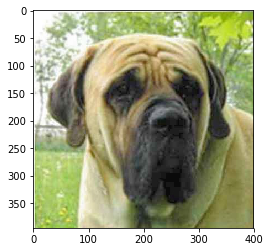

Let me check... ~[0_0]~

Hey dog, Come here! ~[^_^]~
It looks like you are a Mastiff.
____________________________________________________________ 



In [101]:
for file in np.hstack((human_files[:5], dog_files[:5])):
    run_app(file)